## Imports and Setup

In [1]:
import os
import sys
sys.path.insert(0, "../utils/")
import cnn_utils
import config_utils

import pandas as pd
import numpy as np
import geopandas as gpd

import torch

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

## Load Configuration

In [9]:
iso = "RWA"
config_file = "configs/cnn_configs/xception.yaml"

cwd = os.path.dirname(os.getcwd())
config = config_utils.load_config(os.path.join(cwd, config_file))
config["iso_codes"] = [iso]
data, data_loader, classes = cnn_utils.load_dataset(config, phases=["train", "test"])

INFO:root:Reading file /home/itingzon.unicef/giga/data/vectors/train/RWA_train.geojson
INFO:root:
  rurban  iso       class  count  percentage
0  rural  RWA  non_school    227    0.036857
1  rural  RWA      school     81    0.013151
2  urban  RWA  non_school   3108    0.504627
3  urban  RWA      school   2743    0.445365
INFO:root:
                               count  percentage
rurban iso class      dataset                   
rural  RWA non_school test        43    0.034931
                      train      184         NaN
           school     test        18    0.014622
                      train       63         NaN
urban  RWA non_school test       625    0.507717
                      train     2483         NaN
           school     test       544    0.441917
                      train     2199         NaN
INFO:root:
                    count
dataset class            
test    non_school    668
        school        562
train   non_school   2667
        school       2262
INFO:root

## Visualize Samples

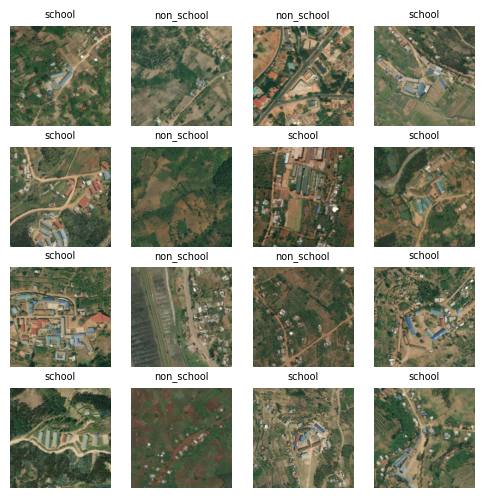

In [10]:
cnn_utils.visualize_data(data, data_loader, phase='train')

## Load Model

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model, criterion, optimizer, scheduler = cnn_utils.load_model(
    n_classes=len(classes),
    model_type=config["model"],
    pretrained=config["pretrained"],
    scheduler_type=config["scheduler"],
    optimizer_type=config["optimizer"],
    label_smoothing=config["label_smoothing"],
    lr=config["lr"],
    momentum=config["momentum"],
    gamma=config["gamma"],
    step_size=config["step_size"],
    patience=config["patience"],
    dropout=config["dropout"],
    device=device,
)
model

/home/itingzon.unicef/miniconda3/envs/giga2/lib/python3.10/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(
INFO:timm.models._builder:Loading pretrained weights from url (https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth)
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /home/itingzon.unicef/.cache/torch/hub/checkpoints/xception-43020ad28.pth


Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv